<h1 style="color:blue"> Udacity Data Science Nanodegree Final Project - Urban Sound Classification </h1>

### Dataset Details
We are using a dataset called Urbansound8K. The dataset contains 8732 sound excerpts (<=4s) of urban sounds from 10 classes.

1. Air Conditioner
2. Car Horn
3. Children Playing
4. Dog bark
5. Drilling
6. Engine Idling
7. Gun Shot
8. Jackhammer
9. Siren
10. Street Music

The accompanying metadata contains a unique ID for each sound excerpt along with it's given class name.
The full dataset can be downloaded from https://urbansounddataset.weebly.com/urbansound8k.html

Sample data is added to the Github repository.

These sound excerpts are digital audio files in .wav format.

<h2 style="color:green">Project Objective  </h2>

**We would build a model which will take a .wav sound file as an input and predict which class it belongs to along with a confidence level.**

<h2 style="color:green">Understanding the data  </h2>


Waveform Audio File Format is an audio file format standard, developed by Microsoft and IBM, for storing an audio bitstream on PCs. It is an application of the **Resource Interchange File Format (RIFF) bitstream format method** for storing data in "chunks"

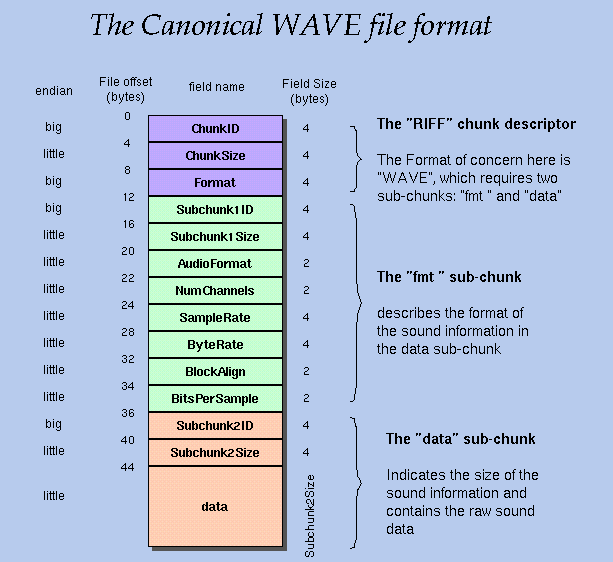

Image Courtesy : http://soundfile.sapp.org/doc/WaveFormat/



<h2 style="color:green">Exploring the data  </h2>


In [1]:
# Load imports

import IPython.display as ipd
import librosa
import librosa.display
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np

In [2]:
metadata_df = pd.read_csv('metadata/UrbanSound8K.csv')
metadata_df.head(30)

slice_file_name    fsID      start        end  salience  fold  classID  \
0     100032-3-0-0.wav  100032   0.000000   0.317551         1     5        3   
1   100263-2-0-117.wav  100263  58.500000  62.500000         1     5        2   
2   100263-2-0-121.wav  100263  60.500000  64.500000         1     5        2   
3   100263-2-0-126.wav  100263  63.000000  67.000000         1     5        2   
4   100263-2-0-137.wav  100263  68.500000  72.500000         1     5        2   
5   100263-2-0-143.wav  100263  71.500000  75.500000         1     5        2   
6   100263-2-0-161.wav  100263  80.500000  84.500000         1     5        2   
7     100263-2-0-3.wav  100263   1.500000   5.500000         1     5        2   
8    100263-2-0-36.wav  100263  18.000000  22.000000         1     5        2   
9     100648-1-0-0.wav  100648   4.823402   5.471927         2    10        1   
10    100648-1-1-0.wav  100648   8.998279  10.052132         2    10        1   
11    100648-1-2-0.wav  100648  16.699509  17.104837         2    10        1   
12    100648-1-3-0.wav  100648  17.631764  19.253075         2    10        1   
13    100648-1-4-0.wav  100648  25.332994  27.197502         2    10        1   
14    100652-3-0-0.wav  100652   0.000000   4.000000         1     2        3   
15    100652-3-0-1.wav  100652   0.500000   4.500000         1     2        3   
16    100652-3-0-2.wav  100652   1.000000   5.000000         1     2        3   
17    100652-3-0-3.wav  100652   1.500000   5.500000         1     2        3   
18    100795-3-0-0.wav  100795   0.191790   4.191790         1    10        3   
19    100795-3-1-0.wav  100795  13.059155  17.059155         1    10        3   
20    100795-3-1-1.wav  100795  13.559155  17.559155         1    10        3   
21    100795-3-1-2.wav  100795  14.059155  18.059155         1    10        3   
22    100852-0-0-0.wav  100852   0.000000   4.000000         1     5        0   
23    100852-0-0-1.wav  100852   0.500000   4.500000         1     5        0   
24   100852-0-0-10.wav  100852   5.000000   9.000000         1     5        0   
25   100852-0-0-11.wav  100852   5.500000   9.500000         1     5        0   
26   100852-0-0-12.wav  100852   6.000000  10.000000         1     5        0   
27   100852-0-0-13.wav  100852   6.500000  10.500000         1     5        0   
28   100852-0-0-14.wav  100852   7.000000  11.000000         1     5        0   
29   100852-0-0-15.wav  100852   7.500000  11.500000         1     5        0   

               class  
0           dog_bark  
1   children_playing  
2   children_playing  
3   children_playing  
4   children_playing  
5   children_playing  
6   children_playing  
7   children_playing  
8   children_playing  
9           car_horn  
10          car_horn  
11          car_horn  
12          car_horn  
13          car_horn  
14          dog_bark  
15          dog_bark  
16          dog_bark  
17          dog_bark  
18          dog_bark  
19          dog_bark  
20          dog_bark  
21          dog_bark  
22   air_conditioner  
23   air_conditioner  
24   air_conditioner  
25   air_conditioner  
26   air_conditioner  
27   air_conditioner  
28   air_conditioner  
29   air_conditioner

In [3]:
print(metadata_df.classID.value_counts())

7    1000
5    1000
4    1000
3    1000
2    1000
9    1000
0    1000
8     929
1     429
6     374
Name: classID, dtype: int64


In [4]:
# Changing name of column 'class' to 'class_name' to avoid issues owing to class being a python reserved term
metadata_df = metadata_df.rename(columns = {"class":"class_name"}) 
metadata_df.head()

slice_file_name    fsID  start        end  salience  fold  classID  \
0    100032-3-0-0.wav  100032    0.0   0.317551         1     5        3   
1  100263-2-0-117.wav  100263   58.5  62.500000         1     5        2   
2  100263-2-0-121.wav  100263   60.5  64.500000         1     5        2   
3  100263-2-0-126.wav  100263   63.0  67.000000         1     5        2   
4  100263-2-0-137.wav  100263   68.5  72.500000         1     5        2   

         class_name  
0          dog_bark  
1  children_playing  
2  children_playing  
3  children_playing  
4  children_playing

In [5]:
print(metadata_df.class_name.value_counts())

jackhammer          1000
drilling            1000
dog_bark            1000
street_music        1000
air_conditioner     1000
engine_idling       1000
children_playing    1000
siren                929
car_horn             429
gun_shot             374
Name: class_name, dtype: int64


As we can see clearly, Siren, Car Horn and Gun shot have considerably lower number of records than the others. So this is an **unbalanced data**. We will take note of this now and check for its impact , if any, down the line.

Lets Spend some time on visual insection of some sample of sound files.

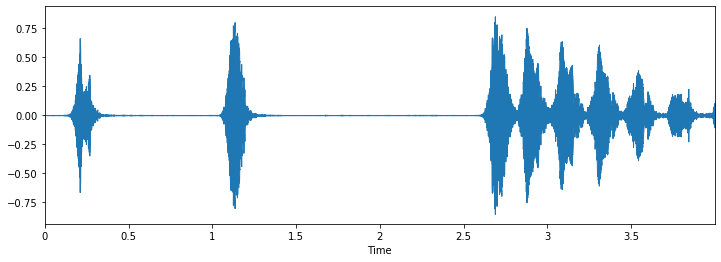

In [6]:
# Dog bark
filename = 'audio/fold1/101415-3-0-2.wav'
plt.figure(figsize=(12,4))
data,sample_rate = librosa.load(filename)
_ = librosa.display.waveplot(data,sr=sample_rate)
ipd.Audio(filename)

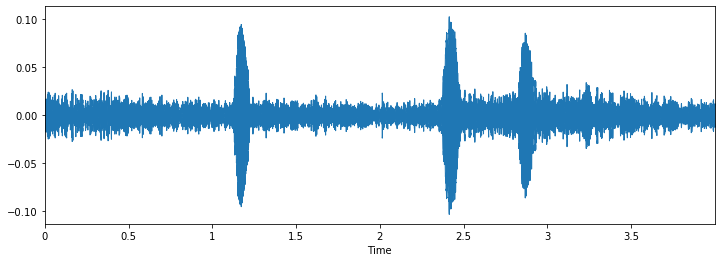

In [7]:
# Dog Bark
filename = 'audio/fold1/102842-3-0-1.wav'
plt.figure(figsize=(12,4))
data,sample_rate = librosa.load(filename)
_ = librosa.display.waveplot(data,sr=sample_rate)
ipd.Audio(filename)

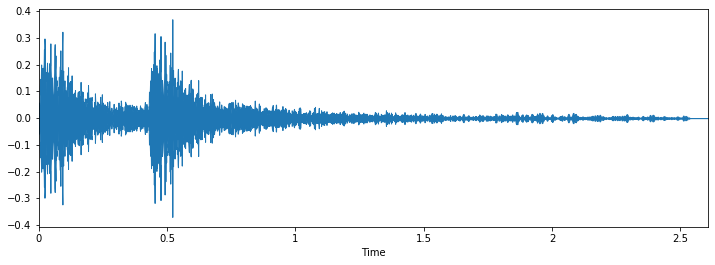

In [8]:
# Gun Shot
filename = 'audio/fold1/102305-6-0-0.wav'
plt.figure(figsize=(12,4))
data,sample_rate = librosa.load(filename)
_ = librosa.display.waveplot(data,sr=sample_rate)
ipd.Audio(filename)

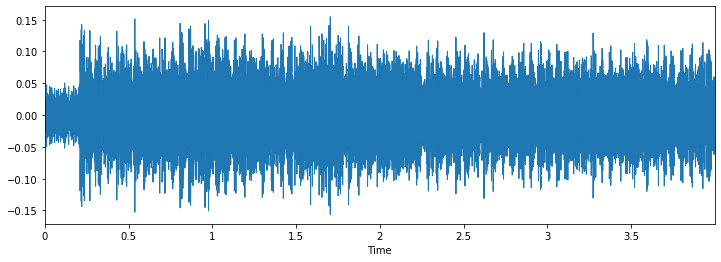

In [9]:
# Gun Shot
filename = 'audio/fold1/103074-7-0-0.wav'
plt.figure(figsize=(12,4))
data,sample_rate = librosa.load(filename)
_ = librosa.display.waveplot(data,sr=sample_rate)
ipd.Audio(filename)

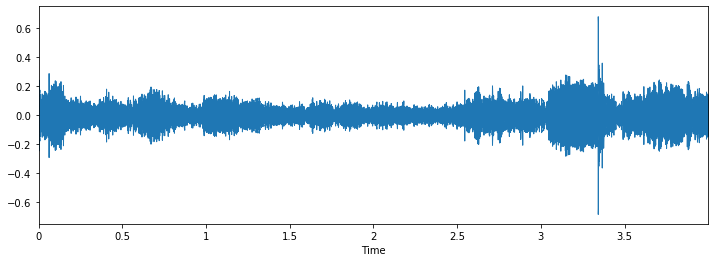

In [10]:
# children_playing
filename = 'audio/fold1/105415-2-0-1.wav'
plt.figure(figsize=(12,4))
data,sample_rate = librosa.load(filename)
_ = librosa.display.waveplot(data,sr=sample_rate)
ipd.Audio(filename)

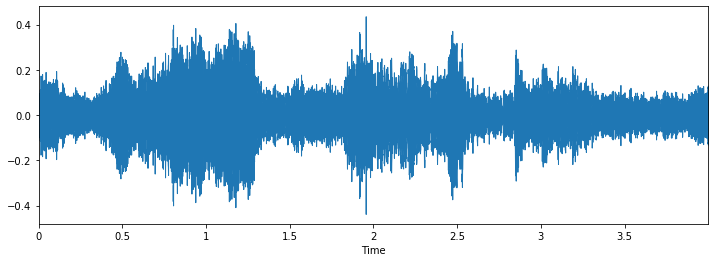

In [11]:
# children_playing
filename = 'audio/fold1/108362-2-0-9.wav'
plt.figure(figsize=(12,4))
data,sample_rate = librosa.load(filename)
_ = librosa.display.waveplot(data,sr=sample_rate)
ipd.Audio(filename)

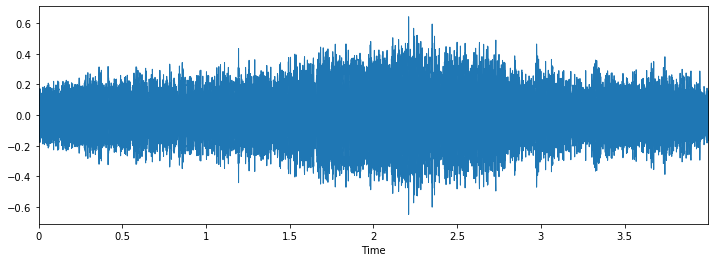

In [12]:
# Siren
filename = 'audio/fold1/106905-8-0-0.wav'
plt.figure(figsize=(12,4))
data,sample_rate = librosa.load(filename)
_ = librosa.display.waveplot(data,sr=sample_rate)
ipd.Audio(filename)

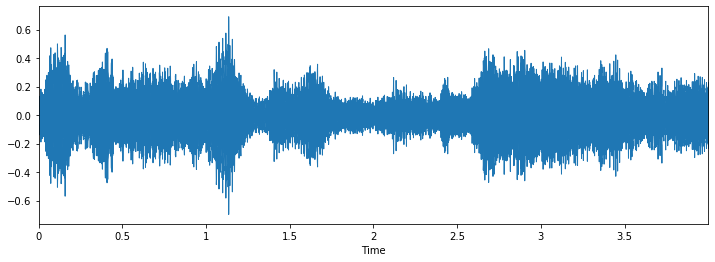

In [13]:
# Street music
filename = 'audio/fold1/108041-9-0-7.wav'
plt.figure(figsize=(12,4))
data,sample_rate = librosa.load(filename)
_ = librosa.display.waveplot(data,sr=sample_rate)
ipd.Audio(filename)

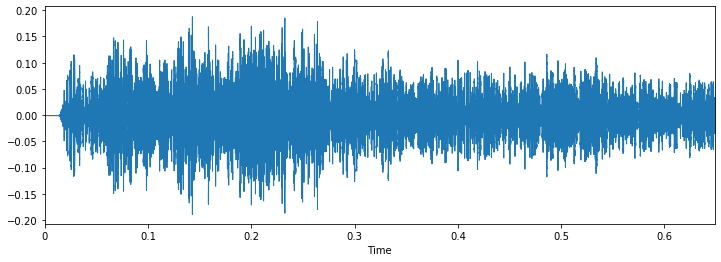

In [14]:
# Car Horn
filename = 'audio/fold10/100648-1-0-0.wav'
plt.figure(figsize=(12,4))
data,sample_rate = librosa.load(filename)
_ = librosa.display.waveplot(data,sr=sample_rate)
ipd.Audio(filename)

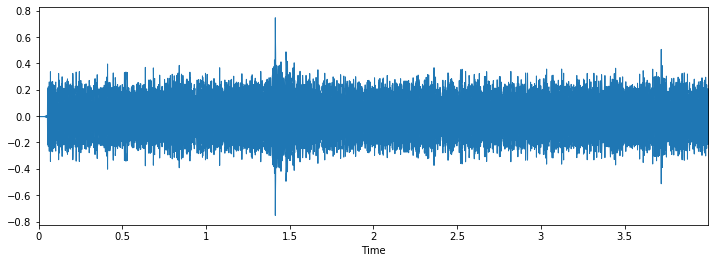

In [15]:
# Air Conditioner
filename = 'audio/fold5/100852-0-0-0.wav'
plt.figure(figsize=(12,4))
data,sample_rate = librosa.load(filename)
_ = librosa.display.waveplot(data,sr=sample_rate)
ipd.Audio(filename)

<h2 style="color:red">PROBLEM STATEMENT </h2>

1. It is **tough to predict** the classes based on **visual inspection**
2. There has been great deal of **similarity observed in certain instances of different classes** such as car horn and street music
3. At the same time, different instances of gun shots showed very different visuals, possibly owing to usage of different catgory of guns used
4. **So while the greatest of all programmed devices ever - our brain can decifer the sounds using ears, it fails to do the same using our eyes!**
5. It will be exciting to see how well a software model learns and adopts to the available data and predicts the class of sound!

<h2 style="color:green">METRIC </h2>

We will use below metrics to evaluate achievement of project objectives:
1. The Pre-training model prediction accuracy Vs Post training model prediction accuracy - Significant improvement should be observed
2. Accuracy of prediction on training data Vs Accuracy of prediction on Testing data - The difference should be low to prove no overfitting of model
3. Gradual Improvement in testing data prediction accuracy as we refine our models

### Audio file properties - Number of Channels, Sample rate and bit depth decoding
Below class and function decodes the Number of Channels, Sample rate and bit depth decoding for any wave file provided as input

In [16]:
import struct

class WaveFileDecoder():
    
    def decode_file_properties(self, wave_file_name):

        wave_file = open(wave_file_name,"rb")
        
        riff = wave_file.read(12)
        fmt = wave_file.read(36)
        
        number_of_channels_string = fmt[10:12]
        number_of_channels_float = struct.unpack('<H', number_of_channels_string)[0]

        sample_rate_string = fmt[12:16]
        sample_rate_float = struct.unpack("<I",sample_rate_string)[0]
        
        bit_depth_string = fmt[22:24]
        bit_depth_float = struct.unpack("<H",bit_depth_string)[0]

        return (number_of_channels_float, sample_rate_float, bit_depth_float)


We will iterate through every sound file to decode its properties using class function above and store it in a dataframe

In [17]:
WaveFileDecoder = WaveFileDecoder()

sound_files_decoded = []
for index, row in metadata_df.iterrows():
    
    wave_file_name = os.path.join(os.path.abspath('audio/'),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    sound_file_decoded = WaveFileDecoder.decode_file_properties(wave_file_name)
    sound_files_decoded.append(sound_file_decoded)

# Convert into a Panda dataframe
sound_files_decoded_df = pd.DataFrame(sound_files_decoded, columns=['number_of_channels_float','sample_rate_float','bit_depth_float'])
print(sound_files_decoded_df.head())
print(sound_files_decoded_df.shape)

   number_of_channels_float  sample_rate_float  bit_depth_float
0                         2              44100               16
1                         2              44100               16
2                         2              44100               16
3                         2              44100               16
4                         2              44100               16
(8732, 3)


In [18]:
# Channels
# sound_files_decoded_df.number_of_channels_float.value_counts()
sound_files_decoded_df.number_of_channels_float.value_counts(normalize=True)

2    0.915369
1    0.084631
Name: number_of_channels_float, dtype: float64

### Channels
1. 91.5% of the files have two audio channels (stereo) 
2. Less than 9% have just the one channel (mono)

In [19]:
# Sample rates
print(sound_files_decoded_df.sample_rate_float.value_counts(normalize=True))

44100     0.614979
48000     0.286532
96000     0.069858
24000     0.009391
16000     0.005153
22050     0.005039
11025     0.004466
192000    0.001947
8000      0.001374
11024     0.000802
32000     0.000458
Name: sample_rate_float, dtype: float64


### Sample Rate
Sample rates have a wide range of values which will not go well for apple to apple comparison of their waveforms. We would need to consider some sort of normalization to bring them at par.





In [20]:
# bit depth

print(sound_files_decoded_df.bit_depth_float.value_counts(normalize=True))


16    0.659414
24    0.315277
32    0.019354
8     0.004924
4     0.001031
Name: bit_depth_float, dtype: float64


### Bit Depth
Bit Depth have a wide range of values as well which will not go well for apple to apple comparison of their waveforms. We would need to consider some sort of normalization to bring them at par.

<h2 style="color:green"> Initial Model Selection </h2>


### Logic 
Now as we have broken down the sound file in its basic building blocks, we can see clearly the similarity of it to those of a typical image components. So it makes a good logic to treat the sound classification problem with the similar techniques of image classification - based on **Deep Learning!**

### Solution
1. Extract Mel-Frequency Cepstral Coefficients (MFCC) from the the audio samples on a per-frame basis with a window size of a few milliseconds. The MFCC summarises the frequency distribution across the window size, so it is possible to analyse both the frequency and time characteristics of the sound. 
2. Identify features for classification from these audio representations.
3. Decide on a Deep Neural Network for the purpose
4. Train the selected Deep Neural Network with these data sets and make predictions. 
5. Start simple - Choose a simple neural network architecture, such as Multi-Layer Perceptron before experimenting with more complex architectures such as Convolutional Neural Networks.

<h2 style="color:green"> Data Preparation </h2>


### Normalizing the audio file properties as discussed above - 
1. Sample Rate
2. Bit Depth
3. Audio Channels

We will use Librosa's 'Load' function to for this purpose. 
SciPy's wave library reads the above properties as they are, but Librosa's load function automatically extracts these at a predetermined standard level. 
<br>

We will try this technique on a sample audio file

#### Sample Rate and bit depth

In [21]:
import librosa 
from scipy.io import wavfile as wav
import numpy as np

file_name = 'audio/fold5/100852-0-0-0.wav'

audio_librosa, sample_rate_librosa = librosa.load(file_name) 
sample_rate_scipy, audio_scipy = wav.read(file_name) 

# audio property is bit depth and sample rate is sample rate

print(audio_librosa) 
print(audio_scipy)

print('Sample rate before Librosa conversion:', sample_rate_scipy) 
print('Sample rate post Librosa conversion:', sample_rate_librosa)

print('Bit Depth Range before Librosa conversion:', np.min(audio_scipy), 'TO', np.max(audio_scipy))
print('Bit Depth Range post Librosa conversion:', np.min(audio_librosa), 'TO', np.max(audio_librosa))



[0.         0.         0.         ... 0.07372634 0.01683928 0.02111044]
[[   0    0]
 [   0    0]
 [   0    0]
 ...
 [1394 -815]
 [ 541  377]
 [1838  834]]
Sample rate before Librosa conversion: 44100
Sample rate post Librosa conversion: 22050
Bit Depth Range before Librosa conversion: -23628 TO 27507
Bit Depth Range post Librosa conversion: -0.50266445 TO 0.74983937


- **Librosa’s load function converted the sampling rate of the file to 22050 Hz from the original 44100 Hz**
- **Librosa’s load function converted the range of Bith Depth of the file between -1 to 1**

#### Audio Channels
Let's plot the audio files to see how audio channels are being treated before and after conversion

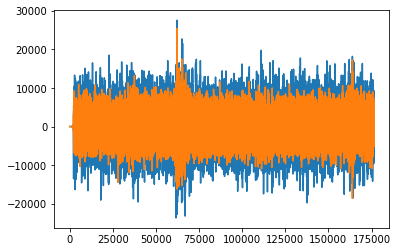

In [22]:
scipy_plot=plt.plot(audio_scipy)

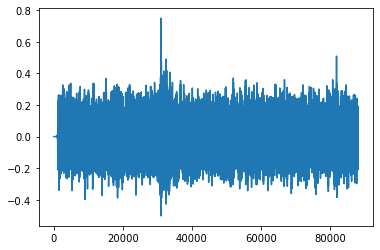

In [23]:
librosa_plot= plt.plot(audio_librosa)

**As we see, Librosa conversion is converting the sterio (2 channels) files into mono (single channel) which is needed for the data consistency we need for modelling**

#### Mel-Frequency Cepstral Coefficients- MFCC
We will extract Mel-Frequency Cepstral Coefficients (MFCC) from the the audio files. Additional details and reference about MFCC can be found here - https://en.wikipedia.org/wiki/Mel-frequency_cepstrum

Leaving aside understanding the technical complexity of MFCC, it is enough to note for the purpose of this exercise that MFCCs are commonly used as features in speech recognition systems, such as the systems which can automatically recognize numbers spoken into a telephone. MFCCs are also increasingly finding uses in music information retrieval applications such as genre classification, audio similarity measures, etc. which make it ideal method to be used for this project!

#### Extracting MFCC using again, Librosa - What else? :)
Librosa's mfcc() function generates MFCC from time series audio data


(40, 173)


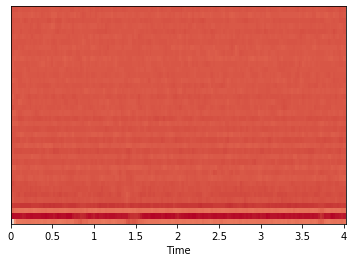

In [24]:
mfcc_extracted = librosa.feature.mfcc(y=audio_librosa, sr=sample_rate_librosa, n_mfcc=40)
print(mfcc_extracted.shape)
librosa.display.specshow(mfcc_extracted, sr=sample_rate_librosa, x_axis='time')

Write a function 'extract_features' to extract the MFCC from a wave file.

In [25]:
def extract_features(file_name):
   
    try:
        audio_librosa, sample_rate_librosa = librosa.load(file_name, res_type='kaiser_fast') 
        mfcc_extracted = librosa.feature.mfcc(y=audio_librosa, sr=sample_rate_librosa, n_mfcc=40)
        mfcc_mean = np.mean(mfcc_extracted.T,axis=0)
        
    except Exception as e:
        print("Extraction Error for File: ", file)
        return None
     
    return mfcc_mean

In [26]:
sample_extract= extract_features(file_name)
sample_extract
print(file_name)

audio/fold5/100852-0-0-0.wav


Extract MFCC for each audio file in the dataset and store it in a Pandas Dataframe with it's classification label

In [27]:
mfcc_features = []

# Iterate through each sound file and extract the features 
for index, row in metadata_df.iterrows():
    
    file_name_x = os.path.join(os.path.abspath('audio/'),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    # print(file_name_x)
    
    class_label = row['class_name']
    mfcc_data = extract_features(file_name_x)
    
    mfcc_features.append([mfcc_data, class_label])

# Convert into a Panda dataframe 
mfcc_features_df = pd.DataFrame(mfcc_features, columns=['feature','class_label'])
mfcc_features_df.head()
print('Finished feature extraction from ', len(mfcc_features_df), ' files')

Finished feature extraction from  8732  files


#### Numerical Encoding of Label data

In [28]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

# Convert the data from a dataframe to numpy arrays needed for encoding
X = np.array(mfcc_features_df.feature.tolist())
y_array = np.array(mfcc_features_df.class_label.tolist())

# Numerical Encoding of Label data
# Can be tried with one hot encoding as well
label_encoder = LabelEncoder()
y = to_categorical(label_encoder.fit_transform(y_array))

Using TensorFlow backend.
C:\Users\manishb\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\manishb\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\manishb\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:

Let's have a look at the encoded data. 

In [29]:
print(X.shape)
print(y.shape)
print(X[:5, :10])
print(y[:5, :10])


(8732, 40)
(8732, 10)
[[-215.793        71.66612    -131.81377     -52.091335    -22.115969
   -21.76418     -11.183748     18.912683      6.7266383    14.556895  ]
 [-424.68686     110.562294    -54.14824      62.01074      -0.7095157
    18.157396      1.4451554    11.161129     -1.70589      12.360451  ]
 [-459.56473     122.80033     -47.924713     53.265697     -1.1398684
    24.772371      7.9801345     9.674256     -1.0235437    11.204448  ]
 [-414.55374     102.89688     -36.664955     54.18041       0.48600346
    15.6970625     2.1551306     8.104217     -2.4878216    10.018101  ]
 [-447.39703     115.0954      -53.809113     61.608585      1.6425979
    26.112858      1.9950668    10.739072      2.5962996    10.635986  ]]
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


As can be seen, the labels are now hot encoded to an array of 0's and 1's, with every row having only single 1 value. This is the class of the sound file.

#### Split the dataset into training and testing sets (Testing set 25% of the overall dataset)

In [30]:
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 42)

In [31]:
print(x_train.shape)
print(y_train.shape)

(6549, 40)
(6549, 10)


<h2 style="color:green"> Building and Training the Model </h2>

### MLP: Model Description and relevance

#### What are MLP?
Multi-layer perceptron’s (MLP) are a type of Deep Neural Network as they are composed of more than one layer of perceptrons and use non-linear activation which distinguish them from linear perceptrons. 

#### MLP - How does it work?
MLP architecture consists of an input layer, an output layer that ultimately make a prediction about the input, and in-between these two layers there are an arbitrary number of hidden layers.These hidden layers have no direct connection with the outside world and perform the model computations. The network is fed a labelled dataset (this being a form of supervised learning) of input-output pairs and is then trained to learn a correlation between those inputs and outputs.The training process involves adjusting the weights and biases within the perceptrons in the hidden layers in order to minimise the error.The algorithm for training an MLP is known as **Backpropagation**. Starting with all weights in the network being randomly assigned, the inputs do a forward pass through the network and the decision of the output layer is measured against the ground truth of the labels you want to predict. Then the weights and biases are backpropagated back though the network where an optimisation method, typically **Stochastic Gradient descent** is used to adjust the weights so they will move one step closer to the error minimum on the next pass. The training phase will keep on performing this cycle on the network until it the error can go no lower which is known as convergence.

#### MLP - Process of building

1. Start with constructing a Multilayer Perceptron (MLP) Neural Network using **Keras and a Tensorflow backend.**
2. Start with a **sequential model** so we can build the model layer by layer
3. Begin with a **simple model architecture**, consisting of three layers, an input layer, a hidden layer and an output layer. 
4. All three layers will be of the **dense layer** type which is a standard layer type that is used in many cases for neural networks.
5. The first layer will receive the input shape. As each sample contains **40 MFCCs** (or columns) we have a shape of (1x40) this means we will start with an input shape of 40.
6. The first two layers will have 256 nodes. The activation function we will be using for our first 2 layers is the ReLU, or **Rectified Linear Activation**. This activation function has been proven to work well in neural networks.
7. Apply a **Dropout value of 50%** on our first two layers. This will randomly exclude nodes from each update cycle which in turn results in a network that is capable of **better generalisation** and is less likely to overfit the training data.
8. Our **output layer** will have 10 nodes (num_labels) which matches the number of possible classifications. The activation is for our output layer is **softmax**. Softmax makes the output sum up to 1 so the output can be interpreted as probabilities. The model will then make its prediction based on which option has the highest probability.

### Build the Model

In [32]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.optimizers import Adam
from keras.utils import np_utils
from sklearn import metrics 

num_labels = y.shape[1]
filter_size = 2

model_mlp = Sequential()

model_mlp.add(Dense(256, input_shape=(40,)))
model_mlp.add(Activation('relu'))
model_mlp.add(Dropout(0.5))

model_mlp.add(Dense(256))
model_mlp.add(Activation('relu'))
model_mlp.add(Dropout(0.5))

model_mlp.add(Dense(num_labels))
model_mlp.add(Activation('softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


#### Compile the Model - Process
1. Define the **Loss function** - Use **categorical_crossentropy**. This is the most common choice for classification. A lower score indicates that the model is performing better.
2. Define the **Metrics** - Use the **accuracy metric** which will allow us to view the accuracy score on the validation data when we train the model.
3. Define the **Optimizer** - Use **adam** which is a generally good optimizer for many use cases.

In [33]:
model_mlp.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [34]:
# Display model architecture summary 
model_mlp.summary()

# Calculate pre-training accuracy 
score = model_mlp.evaluate(x_test, y_test, verbose=0)
accuracy = 100*score[1]

print("Pre-training accuracy: %.4f%%" % accuracy)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               10496     
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
activation_2 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
__________

### Train the Model - Process
1. Start with 120 Epochs. Model will cycle through the data 120 times. It will improve on each cycle until it reaches a point of saturation.
2. Start with a moderate batch size so as to avoid overfitting possibilities. 

In [35]:
from keras.callbacks import ModelCheckpoint 
from datetime import datetime

epochs = 120
batch_size = 32

checkpoint = ModelCheckpoint(filepath='Saved Checkpoints/weights.best.basic_mlp.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model_mlp.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test), callbacks=[checkpoint], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Instructions for updating:
Use tf.cast instead.
Train on 6549 samples, validate on 2183 samples
Epoch 1/120
6549/6549 [==============================] - 1s 182us/step - loss: 12.8819 - acc: 0.1710 - val_loss: 11.7192 - val_acc: 0.2515

Epoch 00001: val_loss improved from inf to 11.71918, saving model to Saved Checkpoints/weights.best.basic_mlp.hdf5
Epoch 2/120
6549/6549 [==============================] - 1s 133us/step - loss: 11.4342 - acc: 0.2486 - val_loss: 9.5317 - val_acc: 0.3317

Epoch 00002: val_loss improved from 11.71918 to 9.53174, saving model to Saved Checkpoints/weights.best.basic_mlp.hdf5
Epoch 3/120
6549/6549 [==============================] - 1s 143us/step - loss: 9.2015 - acc: 0.3246 - val_loss: 4.2622 - val_acc: 0.4966

Epoch 00003: val_loss improved from 9.53174 to 4.26224, saving model to Saved Checkpoints/weights.best.basic_mlp.hdf5
Epoch 4/120
6549/6549 [==============================] - 1s 161us/step - loss: 3.5804 - acc: 0.3831 - val_loss: 1.6943 - val_acc: 0.510


Epoch 00033: val_loss improved from 0.59609 to 0.57709, saving model to Saved Checkpoints/weights.best.basic_mlp.hdf5
Epoch 34/120
6549/6549 [==============================] - 1s 133us/step - loss: 0.7198 - acc: 0.7561 - val_loss: 0.5725 - val_acc: 0.8227

Epoch 00034: val_loss improved from 0.57709 to 0.57251, saving model to Saved Checkpoints/weights.best.basic_mlp.hdf5
Epoch 35/120
6549/6549 [==============================] - 1s 143us/step - loss: 0.7288 - acc: 0.7525 - val_loss: 0.5696 - val_acc: 0.8177

Epoch 00035: val_loss improved from 0.57251 to 0.56961, saving model to Saved Checkpoints/weights.best.basic_mlp.hdf5
Epoch 36/120
6549/6549 [==============================] - 1s 138us/step - loss: 0.7085 - acc: 0.7543 - val_loss: 0.5467 - val_acc: 0.8291

Epoch 00036: val_loss improved from 0.56961 to 0.54673, saving model to Saved Checkpoints/weights.best.basic_mlp.hdf5
Epoch 37/120
6549/6549 [==============================] - 1s 136us/step - loss: 0.7342 - acc: 0.7525 - val_los


Epoch 00071: val_loss improved from 0.44374 to 0.44175, saving model to Saved Checkpoints/weights.best.basic_mlp.hdf5
Epoch 72/120
6549/6549 [==============================] - 1s 136us/step - loss: 0.5767 - acc: 0.8071 - val_loss: 0.4262 - val_acc: 0.8672

Epoch 00072: val_loss improved from 0.44175 to 0.42619, saving model to Saved Checkpoints/weights.best.basic_mlp.hdf5
Epoch 73/120
6549/6549 [==============================] - 1s 117us/step - loss: 0.5739 - acc: 0.8143 - val_loss: 0.4330 - val_acc: 0.8754

Epoch 00073: val_loss did not improve from 0.42619
Epoch 74/120
6549/6549 [==============================] - 1s 133us/step - loss: 0.5465 - acc: 0.8146 - val_loss: 0.4573 - val_acc: 0.8603

Epoch 00074: val_loss did not improve from 0.42619
Epoch 75/120
6549/6549 [==============================] - 1s 122us/step - loss: 0.5524 - acc: 0.8172 - val_loss: 0.4371 - val_acc: 0.8708

Epoch 00075: val_loss did not improve from 0.42619
Epoch 76/120
6549/6549 [==============================

6549/6549 [==============================] - 1s 170us/step - loss: 0.5082 - acc: 0.8337 - val_loss: 0.4037 - val_acc: 0.8749

Epoch 00111: val_loss did not improve from 0.39082
Epoch 112/120
6549/6549 [==============================] - 1s 171us/step - loss: 0.4976 - acc: 0.8357 - val_loss: 0.3924 - val_acc: 0.8873

Epoch 00112: val_loss did not improve from 0.39082
Epoch 113/120
6549/6549 [==============================] - 1s 158us/step - loss: 0.5073 - acc: 0.8313 - val_loss: 0.3997 - val_acc: 0.8855

Epoch 00113: val_loss did not improve from 0.39082
Epoch 114/120
6549/6549 [==============================] - 1s 165us/step - loss: 0.5269 - acc: 0.8264 - val_loss: 0.3974 - val_acc: 0.8832

Epoch 00114: val_loss did not improve from 0.39082
Epoch 115/120
6549/6549 [==============================] - 1s 184us/step - loss: 0.5073 - acc: 0.8323 - val_loss: 0.4155 - val_acc: 0.8754

Epoch 00115: val_loss did not improve from 0.39082
Epoch 116/120
6549/6549 [==============================] - 

### Test the model

In [36]:
train_score = model_mlp.evaluate(x_train, y_train, verbose=0)
print("Training Accuracy: ", train_score[1])

test_score = model_mlp.evaluate(x_test, y_test, verbose=0)
print("Testing Accuracy: ", test_score[1])

Training Accuracy:  0.9393800580514299
Testing Accuracy:  0.8827301878149336


Reasonable training and testing accuracy! **No loss of accuracy on testing dataset indicates that the model is generalizing well and there is no overfitting!**

### Predict with the MLP model

In [37]:
def predict(file_name):
    features_predicted = extract_features(file_name)
    # print(features_predicted)
    # print(features_predicted.shape)
    
    if (features_predicted.ndim == 1):
        features_predicted = np.array([features_predicted])
        
    # print(features_predicted)
    # print(features_predicted.shape)
    
    predicted_label_vector = model_mlp.predict_classes(features_predicted)
    predicted_label = label_encoder.inverse_transform(predicted_label_vector)
    print("The predicted class is:", predicted_label[0], '\n') 

    predicted_probability_vector = model_mlp.predict_proba(features_predicted) 
    predicted_probability = predicted_probability_vector[0]
    for i in range(len(predicted_probability)): 
        class_category = label_encoder.inverse_transform(np.array([i]))
        print(class_category[0], "\t\t : ", format(predicted_probability[i], '.3f') )

### Test the prediction by using it on a sample file 

In [38]:
# Dog Bark
file_name = 'audio/fold1/102842-3-0-1.wav'
predict(file_name)

The predicted class is: dog_bark 

air_conditioner 		 :  0.000
car_horn 		 :  0.000
children_playing 		 :  0.000
dog_bark 		 :  0.999
drilling 		 :  0.000
engine_idling 		 :  0.000
gun_shot 		 :  0.000
jackhammer 		 :  0.000
siren 		 :  0.000
street_music 		 :  0.000


In [39]:
# children_playing
file_name = 'audio/fold1/108362-2-0-9.wav'
predict(file_name)

The predicted class is: children_playing 

air_conditioner 		 :  0.050
car_horn 		 :  0.002
children_playing 		 :  0.539
dog_bark 		 :  0.088
drilling 		 :  0.018
engine_idling 		 :  0.036
gun_shot 		 :  0.063
jackhammer 		 :  0.007
siren 		 :  0.027
street_music 		 :  0.169


In [40]:
# Siren
file_name = 'audio/fold1/106905-8-0-0.wav'
predict(file_name)

The predicted class is: siren 

air_conditioner 		 :  0.000
car_horn 		 :  0.002
children_playing 		 :  0.007
dog_bark 		 :  0.077
drilling 		 :  0.073
engine_idling 		 :  0.053
gun_shot 		 :  0.000
jackhammer 		 :  0.000
siren 		 :  0.772
street_music 		 :  0.015


In [41]:
# Gun Shot
file_name = 'audio/fold1/103074-7-0-0.wav'
predict(file_name)

The predicted class is: jackhammer 

air_conditioner 		 :  0.039
car_horn 		 :  0.012
children_playing 		 :  0.069
dog_bark 		 :  0.015
drilling 		 :  0.169
engine_idling 		 :  0.024
gun_shot 		 :  0.012
jackhammer 		 :  0.403
siren 		 :  0.007
street_music 		 :  0.250


In [42]:
# Gun Shot
file_name = 'audio/fold1/102305-6-0-0.wav'
predict(file_name)

The predicted class is: children_playing 

air_conditioner 		 :  0.000
car_horn 		 :  0.000
children_playing 		 :  0.601
dog_bark 		 :  0.072
drilling 		 :  0.000
engine_idling 		 :  0.000
gun_shot 		 :  0.325
jackhammer 		 :  0.000
siren 		 :  0.001
street_music 		 :  0.000


In [43]:
# Air Conditioner
file_name = 'audio/fold5/100852-0-0-0.wav'
predict(file_name)

The predicted class is: air_conditioner 

air_conditioner 		 :  1.000
car_horn 		 :  0.000
children_playing 		 :  0.000
dog_bark 		 :  0.000
drilling 		 :  0.000
engine_idling 		 :  0.000
gun_shot 		 :  0.000
jackhammer 		 :  0.000
siren 		 :  0.000
street_music 		 :  0.000


A cursory check shows the model predicting reasonably well for sample files with an exception of a gunshot being classified as jackhammer and Dog bark being classified as street music ( although it has very near probability for Dog bark, street music and children playing

### Real World Check
Let's download some sound files from internet and check if our model do a good job in classifying them.

In [44]:
# Gun shot
file_name = 'audio/WebSamples/GunShotSample.wav'
predict(file_name)

The predicted class is: gun_shot 

air_conditioner 		 :  0.000
car_horn 		 :  0.000
children_playing 		 :  0.000
dog_bark 		 :  0.002
drilling 		 :  0.000
engine_idling 		 :  0.000
gun_shot 		 :  0.998
jackhammer 		 :  0.000
siren 		 :  0.000
street_music 		 :  0.000


In [45]:
# Dog Bark
file_name = 'audio/WebSamples/DogBark.wav'
predict(file_name)

The predicted class is: children_playing 

air_conditioner 		 :  0.013
car_horn 		 :  0.005
children_playing 		 :  0.635
dog_bark 		 :  0.154
drilling 		 :  0.033
engine_idling 		 :  0.003
gun_shot 		 :  0.046
jackhammer 		 :  0.001
siren 		 :  0.006
street_music 		 :  0.104


In [46]:
# Police Siren
file_name = 'audio/WebSamples/PoliceSiren.wav'
predict(file_name)

The predicted class is: drilling 

air_conditioner 		 :  0.000
car_horn 		 :  0.000
children_playing 		 :  0.000
dog_bark 		 :  0.000
drilling 		 :  1.000
engine_idling 		 :  0.000
gun_shot 		 :  0.000
jackhammer 		 :  0.000
siren 		 :  0.000
street_music 		 :  0.000


In [47]:
# Car Horn
file_name = 'audio/WebSamples/CarHorn.wav'
predict(file_name)

The predicted class is: dog_bark 

air_conditioner 		 :  0.000
car_horn 		 :  0.000
children_playing 		 :  0.000
dog_bark 		 :  0.999
drilling 		 :  0.000
engine_idling 		 :  0.000
gun_shot 		 :  0.001
jackhammer 		 :  0.000
siren 		 :  0.000
street_music 		 :  0.000


In [48]:
# Car Horn
file_name = 'audio/WebSamples/CarHorn1.wav'
predict(file_name)

The predicted class is: street_music 

air_conditioner 		 :  0.000
car_horn 		 :  0.021
children_playing 		 :  0.000
dog_bark 		 :  0.022
drilling 		 :  0.000
engine_idling 		 :  0.000
gun_shot 		 :  0.000
jackhammer 		 :  0.000
siren 		 :  0.000
street_music 		 :  0.956


In [49]:
# Jackhammer
file_name = 'audio/WebSamples/Jackhammer.wav'
predict(file_name)

The predicted class is: drilling 

air_conditioner 		 :  0.000
car_horn 		 :  0.001
children_playing 		 :  0.002
dog_bark 		 :  0.001
drilling 		 :  0.924
engine_idling 		 :  0.000
gun_shot 		 :  0.000
jackhammer 		 :  0.029
siren 		 :  0.000
street_music 		 :  0.041


In [50]:
# Drilling
file_name = 'audio/WebSamples/Drilling.wav'
predict(file_name)

The predicted class is: drilling 

air_conditioner 		 :  0.059
car_horn 		 :  0.058
children_playing 		 :  0.051
dog_bark 		 :  0.151
drilling 		 :  0.268
engine_idling 		 :  0.102
gun_shot 		 :  0.041
jackhammer 		 :  0.009
siren 		 :  0.106
street_music 		 :  0.155


In [51]:
# PoliceSiren
file_name = 'audio/WebSamples/PoliceSiren3.wav'
predict(file_name)

The predicted class is: siren 

air_conditioner 		 :  0.000
car_horn 		 :  0.000
children_playing 		 :  0.000
dog_bark 		 :  0.000
drilling 		 :  0.000
engine_idling 		 :  0.000
gun_shot 		 :  0.000
jackhammer 		 :  0.000
siren 		 :  1.000
street_music 		 :  0.000


### Verdict on MLP Model
The testing on files external to the database shows interesting results - **it is a mix bag!**
Gun shot, Jack Hammer, sirens are showing correct prediction with high probability, we see incorrect classifications for relatively heterogenious groups such as car horn, street music and drilling! While these initial results are encouraging, there is certain scope for refining our model.

<h2 style="color:green"> Refine the Model </h2>

Let's try out **Convolutional Neural Network (CNN)** instead of earlier simple neural network architecture of Multi-Layer Perceptron (MLP). Difference between MLP and CNN is that MLP takes vector as input and CNN takes tensor as input so CNN can understand spatial relation, hence better suited for complicated image/ sound/ video classification. 

### CNN - The Concept

Convolutional Neural Networks (CNNs) build upon the architecture of MLPs but with a number of important changes. 
1. The layers are organised into three dimensions, width, height and depth. 
2. The nodes in one layer do not necessarily connect to all nodes in the subsequent layer, but often just a sub region of it.

This allows the CNN to perform two important stages. 
1. The first being the feature extraction phase. Here a filter window slides over the input and extracts a sum of the convolution at each location which is then stored in the feature map. A pooling process is often included between CNN layers where typically the max value in each window is taken which decreases the feature map size but retains the significant data. This is important as it reduces the dimensionality of the network meaning it reduces both the training time and likelihood of overfitting. 
2. Then lastly we have the classification phase. This is where the 3D data within the network is flattened into a 1D vector to be output.

For the reasons discussed, both MLPs and CNN’s typically make good classifiers, where CNN’s in particular perform very well with image classification tasks due to their feature extraction and classification parts. This will be very effective at finding patterns within the MFCC’s much like they are effective at finding patterns within images. We will use the evaluation metrics described in earlier sections to compare the performance of these solutions against the benchmark models in the next section.

Before we can use CNN, we need to do some **data preparation** as CNN is more adamont on the input size it can accept. 

### CNN Model Architecture

We will build CNN again using Keras and a Tensorflow backend.
we will use a sequential model, starting with a simple model architecture, consisting of four Conv2D convolution layers, with our final output layer being a dense layer.

The convolution layers are designed for feature detection. It works by sliding a filter window over the input and performing a matrix multiplication and storing the result in a feature map. This operation is known as a convolution.

The *filter* parameter specifies the number of nodes in each layer. Each layer will increase in size from 16, 32, 64 to 128, while the kernel_size parameter specifies the size of the kernel window which in this case is 2 resulting in a 2x2 filter matrix.

The first layer will receive the input shape of (8, 5, 1) 

The activation function we will be using for our convolutional layers is **ReLU** which is the same as our previous model. We will use a *Dropout* value of 30% on our convolutional layers

Each convolutional layer has an associated pooling layer of *MaxPooling2D* type with the final convolutional layer having a *GlobalAveragePooling2D* type. The pooling layer is to **reduce the dimensionality of the model** (by reducing the parameters and subsquent computation requirements) which serves to shorten the training time and reduce overfitting. 
The *Max Pooling* type takes the maximum size for each window and the *Global Average Pooling* type takes the average which is suitable for feeding into our dense output layer.

Our output layer will have 10 nodes which matches the number of possible classifications. The activation is for our output layer is *softmax*. Softmax makes the output sum up to 1 so the output can be interpreted as probabilities. **The model will then make its prediction based on which option has the highest probability.**

### Data Preparation

In [52]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape


((6549, 40), (2183, 40), (6549, 10), (2183, 10))

In [53]:
#reshaping to 2D 
# x_train=np.reshape(x_train,(x_train.shape[0], 40,5))
x_train = x_train.reshape(x_train.shape[0], 8, 5, 1)
x_test= x_test.reshape(x_test.shape[0], 8, 5, 1)

x_train.shape,x_test.shape,y_train.shape,y_test.shape


((6549, 8, 5, 1), (2183, 8, 5, 1), (6549, 10), (2183, 10))

### Initialize the Model

In [54]:
model_CNN =Sequential()

### Build the Model

In [57]:
# Add layers to the model

model_CNN.add(Convolution2D(64,kernel_size=5,strides=1,padding="Same",activation="relu",input_shape=(8,5,1)))
model_CNN.add(MaxPooling2D(padding="same"))

model_CNN.add(Convolution2D(128,kernel_size=5,strides=1,padding="same",activation="relu"))
model_CNN.add(MaxPooling2D(padding="same"))
model_CNN.add(Dropout(0.3))

model_CNN.add(Flatten())

model_CNN.add(Dense(256,activation="relu"))
model_CNN.add(Dropout(0.3))

model_CNN.add(Dense(512,activation="relu"))
model_CNN.add(Dropout(0.3))

model_CNN.add(Dense(10,activation="softmax"))


### Compile the model

In [58]:
model_CNN.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [60]:
# Model architecture summary 
model_CNN.summary()

# Calculate pre-training accuracy 
score = model_CNN.evaluate(x_test, y_test, verbose=1)
accuracy = 100*score[1]

print("Pre-training accuracy: %.4f%%" % accuracy)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 8, 5, 64)          1664      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 3, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 3, 64)          102464    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 2, 2, 128)         204928    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 1, 1, 128)         0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 1, 1, 128)         0         
__________

### Train the model

In [61]:
model_CNN.fit(x_train,y_train,batch_size=256,epochs=72,validation_data=(x_test,y_test))

Train on 6549 samples, validate on 2183 samples
Epoch 1/72
6549/6549 [==============================] - 5s 796us/step - loss: 2.1426 - acc: 0.2107 - val_loss: 1.7470 - val_acc: 0.3463
Epoch 2/72
6549/6549 [==============================] - 4s 637us/step - loss: 1.7553 - acc: 0.3599 - val_loss: 1.5416 - val_acc: 0.4370
Epoch 3/72
6549/6549 [==============================] - 5s 701us/step - loss: 1.5285 - acc: 0.4617 - val_loss: 1.3146 - val_acc: 0.5360
Epoch 4/72
6549/6549 [==============================] - 4s 654us/step - loss: 1.3257 - acc: 0.5437 - val_loss: 1.1238 - val_acc: 0.6148
Epoch 5/72
6549/6549 [==============================] - 5s 715us/step - loss: 1.1542 - acc: 0.6004 - val_loss: 1.1071 - val_acc: 0.6202
Epoch 6/72
6549/6549 [==============================] - 5s 707us/step - loss: 1.0375 - acc: 0.6589 - val_loss: 0.8853 - val_acc: 0.7105
Epoch 7/72
6549/6549 [==============================] - 4s 668us/step - loss: 0.8912 - acc: 0.7016 - val_loss: 0.7873 - val_acc: 0.7416


### Test the model

In [63]:
score = model_CNN.evaluate(x_train, y_train, verbose=0)
print("Training Accuracy: ", score[1])

score = model_CNN.evaluate(x_test, y_test, verbose=0)
print("Testing Accuracy: ", score[1])

Training Accuracy:  0.994350282494977
Testing Accuracy:  0.9102153000731126


The refined model (CNN) accuracy is **significantly better** than the simple MLP model for both training (0.99 Vs 0.92 and testing (0.91 Vs 0.87) datasets. Also very limited deteoriation of CNN training to testing accuracy (0.98 to 0.90) indicates **no issues of overfitting of model.** 


### Predict with refined CNN model

In [64]:
def predict_CNN(file_name):
    features_predicted = extract_features(file_name)
    features_predicted = features_predicted.reshape(1,8,5,1)
    # print(features_predicted)
    # print(features_predicted.shape)
    
    if (features_predicted.ndim == 1):
        features_predicted = np.array([features_predicted])
        
    # print(features_predicted)
    # print(features_predicted.shape)
    
    predicted_label_vector = model_CNN.predict_classes(features_predicted)
    predicted_label = label_encoder.inverse_transform(predicted_label_vector)
    print("The predicted class is:", predicted_label[0], '\n') 

    predicted_probability_vector = model_CNN.predict_proba(features_predicted) 
    predicted_probability = predicted_probability_vector[0]
    for i in range(len(predicted_probability)): 
        class_category = label_encoder.inverse_transform(np.array([i]))
        print(class_category[0], "\t\t : ", format(predicted_probability[i], '.3f') )

### Test the prediction by using it on a sample file 

In [65]:
# Dog Bark
file_name = 'audio/fold1/102842-3-0-1.wav'
predict_CNN(file_name)

The predicted class is: dog_bark 

air_conditioner 		 :  0.000
car_horn 		 :  0.002
children_playing 		 :  0.000
dog_bark 		 :  0.991
drilling 		 :  0.000
engine_idling 		 :  0.002
gun_shot 		 :  0.001
jackhammer 		 :  0.000
siren 		 :  0.001
street_music 		 :  0.003


The above sound file of Dog Bark was being wrongly predicted in earlier MLP model as street music. **But the Refined CNN model is doing a good job of predicting it correctly and that too at high (93%) confidence level**.
Let's try few more misses from earlier model on the refined one.

In [66]:
# Gun Shot
file_name = 'audio/fold1/103074-7-0-0.wav'
predict_CNN(file_name)

The predicted class is: jackhammer 

air_conditioner 		 :  0.000
car_horn 		 :  0.000
children_playing 		 :  0.000
dog_bark 		 :  0.000
drilling 		 :  0.000
engine_idling 		 :  0.000
gun_shot 		 :  0.000
jackhammer 		 :  1.000
siren 		 :  0.000
street_music 		 :  0.000


In [67]:
# children_playing
file_name = 'audio/fold1/108362-2-0-9.wav'
predict_CNN(file_name)

The predicted class is: children_playing 

air_conditioner 		 :  0.000
car_horn 		 :  0.000
children_playing 		 :  0.995
dog_bark 		 :  0.001
drilling 		 :  0.000
engine_idling 		 :  0.000
gun_shot 		 :  0.000
jackhammer 		 :  0.000
siren 		 :  0.000
street_music 		 :  0.003


The Children playing sound file was predicted correctly by the earlier MLP model but at a low confidence level of 47%. The refined CNN model predicts it correctly at a **very high confidence level** of 97.7%
The failure in predicting the gun shot sound may related to the data imbalance we had in the project dataset where in Gun shot  files are significantly lower (37%) than the other set of files.

So as we observe, the earlier model's prediction mistakes in the sample sound predictions are rectified in the refined CNN model which is a good sign of improvement.

### Real World Check
Let's try now CNN model on the real world (outside the project dataset, downloaded non-copyright files from internet) sound files for validation of its prediction accuracy.

Thanks to http://soundbible.com/ for the copyright free sound files

In [68]:
# Dog Bark
file_name = 'audio/WebSamples/DogBark.wav'
predict_CNN(file_name)

The predicted class is: dog_bark 

air_conditioner 		 :  0.000
car_horn 		 :  0.001
children_playing 		 :  0.012
dog_bark 		 :  0.945
drilling 		 :  0.039
engine_idling 		 :  0.000
gun_shot 		 :  0.003
jackhammer 		 :  0.000
siren 		 :  0.000
street_music 		 :  0.000


In [69]:
# Police Siren
file_name = 'audio/WebSamples/PoliceSiren.wav'
predict_CNN(file_name)

The predicted class is: siren 

air_conditioner 		 :  0.000
car_horn 		 :  0.000
children_playing 		 :  0.000
dog_bark 		 :  0.041
drilling 		 :  0.000
engine_idling 		 :  0.000
gun_shot 		 :  0.000
jackhammer 		 :  0.000
siren 		 :  0.959
street_music 		 :  0.000


In [70]:
# Car Horn
file_name = 'audio/WebSamples/CarHorn.wav'
predict_CNN(file_name)

The predicted class is: dog_bark 

air_conditioner 		 :  0.000
car_horn 		 :  0.000
children_playing 		 :  0.000
dog_bark 		 :  0.799
drilling 		 :  0.000
engine_idling 		 :  0.000
gun_shot 		 :  0.200
jackhammer 		 :  0.000
siren 		 :  0.000
street_music 		 :  0.000


In [71]:
# Car Horn
file_name = 'audio/WebSamples/CarHorn1.wav'
predict_CNN(file_name)

The predicted class is: car_horn 

air_conditioner 		 :  0.000
car_horn 		 :  1.000
children_playing 		 :  0.000
dog_bark 		 :  0.000
drilling 		 :  0.000
engine_idling 		 :  0.000
gun_shot 		 :  0.000
jackhammer 		 :  0.000
siren 		 :  0.000
street_music 		 :  0.000


**The improvement in the CNN model over MLP is clearly visible in the real world sound prediction as well. The Dog bark sound which was mis-predicted by MLP, CNN accurately predicts. Same goes true with Siren sound, CNN model correctly predicts it at 100% confidence. However we see even CNN model faltering in predicting mainly the Car horn sounds. This can be mainly because of the data imbalance we had in the project dataset where in Car Horn files are significantly lower (43%) than the other set of files.**

<h2 style="color:green"> Verdict </h2>

The refined model we have now is predicting the dataset test files as well as real world sound files at a reasonable accuracy.
Such a model can find multiple real world use cases, such as 
1. Getting data on different sort of activities happening at a particular area every day --> e.g. # of priority vehicles (ambulance, police cars) passing every hour, Honking frequency and patterns in an area, # of dogs in each of city areas, etc. 
2. Pro-active Crime control: Auto-Alerting police and an ambulance the GPS locations in case of gun shots 

### The use cases can be immense and extensible as to predict any new class of sound, what model would need is simply thousand odd sample files under that sound class!


<h2 style="color:red">Next Improvement area </h2>

While we can be happy with the general accuracy of the refined model, it can be further improved to tackle the issue of **data imbalance** as observed above (Car Horns, drilling, etc.).

1. We can try out some variants of **Decision trees** which frequently perform well on imbalanced data. They work by learning a hierarchy of if/else questions and this can force both classes to be addressed.

2. Another approach to address class imbalance can be resampling technique of **'Oversample minority class'**. which involves adding more copies of the minority class. Oversampling can be a good choice when you don’t have a ton of data to work with, which is very much relevant for our dataset. We can use the resampling module from Scikit-Learn to randomly replicate samples from the minority class. 

Referenced from : https://towardsdatascience.com/methods-for-dealing-with-imbalanced-data-5b761be45a18
